Notebook for EDA on the Netflix and Amazon Data Sets

In [1]:
import pandas as pd
import numpy as np

In [7]:
raw_data = pd.read_csv('MoviesOnStreamingPlatforms_updated.csv')

In [8]:
raw_data.head(5)

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


We're only interested in Amazon Prime and Netflix, so filter out the other sources

In [44]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 17 columns):
Unnamed: 0         16744 non-null int64
ID                 16744 non-null int64
Title              16744 non-null object
Year               16744 non-null int64
Age                7354 non-null object
IMDb               16173 non-null float64
Rotten Tomatoes    5158 non-null object
Netflix            16744 non-null int64
Hulu               16744 non-null int64
Prime Video        16744 non-null int64
Disney+            16744 non-null int64
Type               16744 non-null int64
Directors          16018 non-null object
Genres             16469 non-null object
Country            16309 non-null object
Language           16145 non-null object
Runtime            16152 non-null float64
dtypes: float64(2), int64(8), object(7)
memory usage: 2.2+ MB


In [24]:
netprime_data = raw_data[(raw_data['Netflix']==1) | (raw_data['Prime Video']==1)]

In [13]:
raw_data.shape

(16744, 17)

In [14]:
netprime_data.shape

(15569, 17)

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Distribution of items by year

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108]), <a list of 109 Text xticklabel objects>)

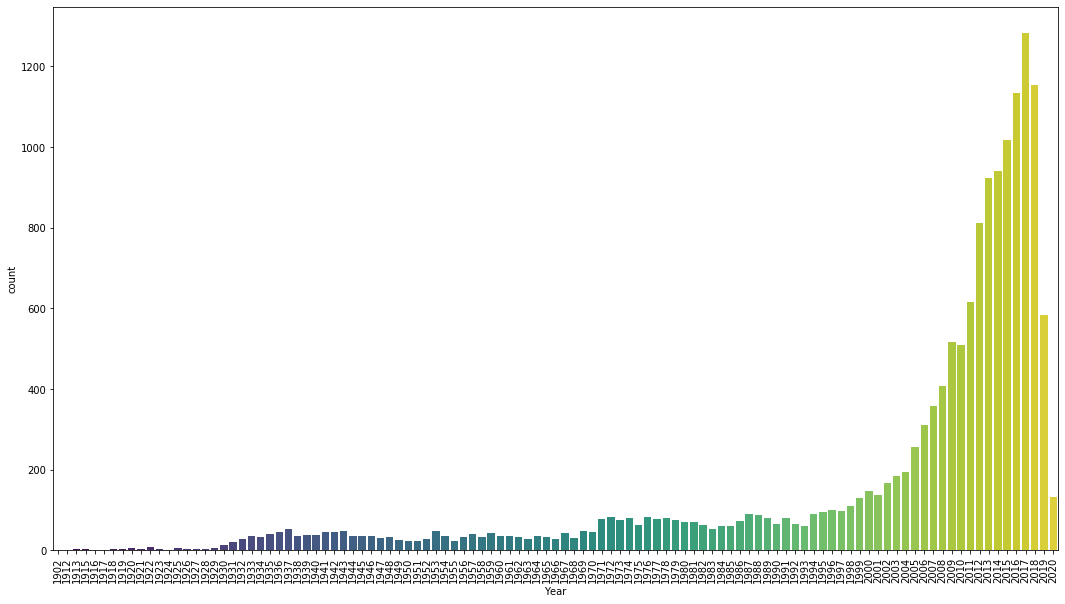

In [22]:
plt.figure(figsize=(18,10))
sns.countplot(x='Year',data=netprime_data,palette='viridis')
plt.xticks(rotation=90)

Good distribution of recent data so we'll select data that's from after 2015

In [25]:
netprime_data_recent = netprime_data[netprime_data['Year'] >= 2015]

In [26]:
netprime_data_recent.shape

(5307, 17)

Now we'll fetch the Indian items - those with languages containing Hindi, Tamil, Telugu, Kannada, Malayalam, Bengali, Marathi, Punjabi, Urdu

In [73]:
def indian_filter(langs):
    if max(langs.find('Hindi'),langs.find('Tamil'),langs.find('Telugu'),langs.find('Kannada'),langs.find('Malayalam'),langs.find('Bengali'),langs.find('Marathi'),langs.find('Punjabi'),langs.find('Urdu')) > -1:
        return 1
    else:
        return 0

First some dataset cleanup - we'll start by dropping those columns we don't care about

In [46]:
netprime_data_recent.columns

Index(['Unnamed: 0', 'ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes',
       'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type', 'Directors',
       'Genres', 'Country', 'Language', 'Runtime'],
      dtype='object')

In [48]:
netprime_data_recent.drop(columns=['Age','Netflix','Hulu','Prime Video','Disney+','Type'],inplace=True)

C:\Users\slaye\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [51]:
netprime_data_recent.columns

Index(['Unnamed: 0', 'ID', 'Title', 'Year', 'IMDb', 'Rotten Tomatoes',
       'Directors', 'Genres', 'Country', 'Language', 'Runtime'],
      dtype='object')

In [52]:
netprime_data_recent.shape

(5307, 11)

In [55]:
netprime_data_recent.dropna(subset=['Language'],inplace=True)

C:\Users\slaye\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [56]:
netprime_data_recent.shape

(4984, 11)

In [74]:
netprime_data_recent['Indian'] = netprime_data_recent['Language'].apply(indian_filter)

C:\Users\slaye\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [76]:
netprime_films_recent_indian = netprime_data_recent[netprime_data_recent['Indian']==1]

In [78]:
netprime_films_recent_indian.drop(columns=['Indian','Country','Unnamed: 0','ID'],inplace=True)

In [79]:
netprime_films_recent_indian.head(10)

,Title,Year,IMDb,Rotten Tomatoes,Directors,Genres,Language,Runtime
34,Dangal,2016,8.4,88%,Nitesh Tiwari,"Action,Biography,Drama,Sport",Hindi,161.0
88,Bahubali: The Beginning,2015,8.1,88%,S.S. Rajamouli,"Action,Drama","Telugu,Tamil",159.0
109,Baahubali 2: The Conclusion,2017,8.2,89%,S.S. Rajamouli,"Action,Drama","Telugu,Tamil",167.0
112,Extraction,2020,6.8,68%,Sam Hargrave,"Action,Thriller","English,Hindi,Bengali",116.0
155,Padman,2018,7.9,100%,R. Balki,"Comedy,Drama",Hindi,140.0
171,Article 15,2019,8.3,89%,Anubhav Sinha,"Crime,Drama,Mystery",Hindi,130.0
191,Kapoor & Sons,2016,7.7,100%,Shakun Batra,"Comedy,Drama,Romance",Hindi,132.0
203,Sairat,2016,8.3,100%,Nagraj Manjule,"Drama,Romance",Marathi,174.0
233,Stree,2018,7.6,77%,Amar Kaushik,"Comedy,Horror",Hindi,128.0
266,Secret Superstar,2017,7.9,90%,Advait Chandan,"Drama,Music",Hindi,150.0


In [80]:
netprime_films_recent_indian.shape

(490, 8)

Now to import shows from the other data sets

In [82]:
netflix_data = pd.read_csv('netflix_data.csv')

In [83]:
netflix_data_shows = netflix_data[netflix_data['type']=='TV Show']

In [86]:
def indian_filter_country(country):
    if country.find('India') > -1:
        return 1
    else:
        return 0

In [87]:
netflix_data_shows.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [88]:
netflix_data_shows.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
11,s12,TV Show,1983,NaN,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law..."
12,s13,TV Show,1994,Diego Enrique Osorno,NaN,Mexico,"May 17, 2019",2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...
16,s17,TV Show,Feb-09,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NaN,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."
24,s25,TV Show,​SAINT SEIYA: Knights of the Zodiac,NaN,"Bryson Baugus, Emily Neves, Blake Shepard, Pat...",Japan,"January 23, 2020",2020,TV-14,2 Seasons,"Anime Series, International TV Shows",Seiya and the Knights of the Zodiac rise again...
26,s27,TV Show,(Un)Well,NaN,NaN,United States,"August 12, 2020",2020,TV-MA,1 Season,Reality TV,This docuseries takes a deep dive into the luc...
29,s30,TV Show,#blackAF,NaN,"Kenya Barris, Rashida Jones, Iman Benson, Genn...",United States,"April 17, 2020",2020,TV-MA,1 Season,TV Comedies,Kenya Barris and his family navigate relations...
38,s39,TV Show,แผนร้ายนายเจ้าเล่ห์,NaN,"Chutavuth Pattarakampol, Sheranut Yusananda, N...",NaN,"March 30, 2019",2016,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...","When two brothers fall for two sisters, they q..."
45,s46,TV Show,Şubat,NaN,"Alican Yücesoy, Melisa Sözen, Musa Uzunlar, Se...",Turkey,"January 17, 2017",2013,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",An orphan subjected to tests that gave him sup...


In [89]:
netflix_data_shows.dropna(subset=['country'],inplace=True)

C:\Users\slaye\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [92]:
netflix_data_shows['Indian show'] = netflix_data_shows['country'].apply(indian_filter_country)

C:\Users\slaye\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [93]:
netflix_data_shows.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Indian show
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,0
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,0
11,s12,TV Show,1983,NaN,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law...",0
12,s13,TV Show,1994,Diego Enrique Osorno,NaN,Mexico,"May 17, 2019",2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...,0
24,s25,TV Show,​SAINT SEIYA: Knights of the Zodiac,NaN,"Bryson Baugus, Emily Neves, Blake Shepard, Pat...",Japan,"January 23, 2020",2020,TV-14,2 Seasons,"Anime Series, International TV Shows",Seiya and the Knights of the Zodiac rise again...,0
26,s27,TV Show,(Un)Well,NaN,NaN,United States,"August 12, 2020",2020,TV-MA,1 Season,Reality TV,This docuseries takes a deep dive into the luc...,0
29,s30,TV Show,#blackAF,NaN,"Kenya Barris, Rashida Jones, Iman Benson, Genn...",United States,"April 17, 2020",2020,TV-MA,1 Season,TV Comedies,Kenya Barris and his family navigate relations...,0
45,s46,TV Show,Şubat,NaN,"Alican Yücesoy, Melisa Sözen, Musa Uzunlar, Se...",Turkey,"January 17, 2017",2013,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",An orphan subjected to tests that gave him sup...,0
51,s52,TV Show,100 Days My Prince,NaN,"Doh Kyung-soo, Nam Ji-hyun, Cho Seong-ha, Cho ...",South Korea,"December 7, 2020",2018,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Upon losing his memory, a crown prince encount...",0
53,s54,TV Show,100 Humans,NaN,"Zainab Johnson, Sammy Obeid, Alie Ward",United States,"March 13, 2020",2020,TV-14,1 Season,"Docuseries, Science & Nature TV",One hundred hardy souls from diverse backgroun...,0


In [94]:
netflix_data_shows_indian = netflix_data_shows[netflix_data_shows['Indian show']==1]

In [95]:
netflix_data_shows_indian.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Indian show
86,s87,TV Show,21 Sarfarosh: Saragarhi 1897,NaN,"Luke Kenny, Mohit Raina, Mukul Dev",India,"December 1, 2018",2018,TV-14,1 Season,"International TV Shows, TV Dramas","In one of history's greatest last stands, a ba...",1
132,s133,TV Show,7 (Seven),Nizar Shafi,"Rahman, Havish, Regina Cassandra, Nandita Swet...",India,"July 30, 2019",2019,TV-14,1 Season,TV Shows,Multiple women report their husbands as missin...,1
340,s341,TV Show,Agent Raghav,NaN,"Sharad Kelkar, Aahana Kumra, Mahesh Manjrekar,...",India,"April 15, 2017",2015,TV-14,1 Season,"Crime TV Shows, International TV Shows, TV Act...","A mix of brilliance, erudition and skill enabl...",1
364,s365,TV Show,Akbar Birbal,NaN,"Kiku Sharda, Vishal Kotian, Delnaaz Irani",India,"March 31, 2020",2019,TV-G,1 Season,"Kids' TV, TV Comedies, TV Dramas","From battles of wit to fights for justice, Emp...",1
533,s534,TV Show,Anjaan: Rural Myths,NaN,NaN,India,"December 15, 2018",2018,TV-14,1 Season,"International TV Shows, TV Horror, TV Thrillers",Spine-chilling stories of malevolent spirits u...,1
534,s535,TV Show,Anjaan: Special Crimes Unit,NaN,"Gashmeer Mahajani, Heena Parmar",India,"May 1, 2018",2018,TV-14,1 Season,"International TV Shows, TV Horror, TV Mysteries",The cases are supernatural; the police officer...,1
686,s687,TV Show,Bad Boy Billionaires: India,NaN,NaN,India,"October 5, 2020",2020,TV-14,1 Season,"British TV Shows, Docuseries, International TV...",This investigative docuseries explores the gre...,1
698,s699,TV Show,Badalte Rishton Ki Dastaan,NaN,"Additi Gupta, Sanjeeda Sheikh, Kiran Karmarkar...",India,"April 1, 2017",2013,TV-14,1 Season,"International TV Shows, TV Dramas","When a man is killed, his wife and his lover –...",1
750,s751,TV Show,Bard of Blood,NaN,"Emraan Hashmi, Viineet Kumar, Sobhita Dhulipal...",India,"September 27, 2019",2019,TV-MA,1 Season,"International TV Shows, TV Action & Adventure,...","Years after a disastrous job in Balochistan, a...",1
856,s857,TV Show,Betaal,NaN,"Viineet Kumar, Aahana Kumra, Suchitra Pillai, ...",India,"May 24, 2020",2020,TV-MA,1 Season,"International TV Shows, TV Action & Adventure,...",Hired to displace tribal villagers to make way...,1


In [97]:
prime_data = pd.read_csv('prime_data.csv',encoding= 'unicode_escape')

In [98]:
prime_data.columns

Index(['S.no.', 'Name of the show', 'Year of release',
       'No of seasons available', 'Language', 'Genre', 'IMDb rating',
       'Age of viewers'],
      dtype='object')

In [99]:
prime_data.head(10)

,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
0,1,Pataal Lok,2020.0,1.0,Hindi,Drama,7.5,18+
1,2,Upload,2020.0,1.0,English,Sci-fi comedy,8.1,16+
2,3,The Marvelous Mrs. Maisel,2017.0,3.0,English,"Drama, Comedy",8.7,16+
3,4,Four More Shots Please,2019.0,2.0,Hindi,"Drama, Comedy",5.3,18+
4,5,Fleabag,2016.0,2.0,English,Comedy,8.7,18+
5,6,Made in Heaven,2019.0,1.0,Hindi,Drama,8.3,18+
6,7,Homecoming,2018.0,2.0,English,Drama,7.5,16+
7,8,Mirzapur,2018.0,1.0,Hindi,Drama,8.5,18+
8,9,The Family Man,2019.0,1.0,Hindi,"Drama, Action",8.6,18+
9,10,Modern Love,2019.0,1.0,English,"Drama, Romance, Comedy",8.0,16+


In [101]:
prime_data.dropna(subset=['Language'],inplace=True)

In [102]:
prime_data['Indian'] = prime_data['Language'].apply(indian_filter)

In [103]:
prime_shows_indian = prime_data[prime_data['Indian']==1]

In [104]:
prime_shows_indian.head(10)

,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers,Indian
0,1,Pataal Lok,2020.0,1.0,Hindi,Drama,7.5,18+,1
3,4,Four More Shots Please,2019.0,2.0,Hindi,"Drama, Comedy",5.3,18+,1
5,6,Made in Heaven,2019.0,1.0,Hindi,Drama,8.3,18+,1
7,8,Mirzapur,2018.0,1.0,Hindi,Drama,8.5,18+,1
8,9,The Family Man,2019.0,1.0,Hindi,"Drama, Action",8.6,18+,1
10,11,Comicstaan,2018.0,2.0,Hindi,"Arts, Entertainment, Culture",NaN,18+,1
11,12,Inside Edge,2017.0,2.0,Hindi,"Sports, Drama",8.0,18+,1
16,17,Breathe,2018.0,1.0,Hindi,"Drama, Suspense",8.4,16+,1
17,18,The Forgotten Army- Azaadi ke Liye,2020.0,1.0,Hindi,"Drama, Action",8.0,18+,1
22,23,One Mic Stand,2019.0,1.0,Hindi,Comedy,6.5,16+,1


The final datasets!

In [105]:
netprime_films_recent_indian.columns

Index(['Title', 'Year', 'IMDb', 'Rotten Tomatoes', 'Directors', 'Genres',
       'Language', 'Runtime'],
      dtype='object')

In [106]:
netflix_data_shows_indian.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'Indian show'],
      dtype='object')

In [107]:
prime_shows_indian.columns

Index(['S.no.', 'Name of the show', 'Year of release',
       'No of seasons available', 'Language', 'Genre', 'IMDb rating',
       'Age of viewers', 'Indian'],
      dtype='object')

Finalise and consolidate columns: 'Title', 'Year', 'IMDb', 'Rotten Tomatoes', 'Directors', 'Genres', 'Language', 'Runtime'

In [113]:
netflix_data_shows_indian.drop(columns=['show_id','type','cast','country','date_added','rating','description'],inplace=True)

KeyError: "['show_id' 'type' 'cast' 'country' 'date_added' 'rating' 'description'] not found in axis"

In [110]:
netflix_data_shows_indian.rename(columns={"title":"Title","director":"Directors","release_year":"Year","duration":"Runtime","listed_in":"Genres"},inplace=True)

C:\Users\slaye\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [111]:
netflix_data_shows_indian.head(10)

,Title,Directors,Year,Runtime,Genres,Indian show
86,21 Sarfarosh: Saragarhi 1897,NaN,2018,1 Season,"International TV Shows, TV Dramas",1
132,7 (Seven),Nizar Shafi,2019,1 Season,TV Shows,1
340,Agent Raghav,NaN,2015,1 Season,"Crime TV Shows, International TV Shows, TV Act...",1
364,Akbar Birbal,NaN,2019,1 Season,"Kids' TV, TV Comedies, TV Dramas",1
533,Anjaan: Rural Myths,NaN,2018,1 Season,"International TV Shows, TV Horror, TV Thrillers",1
534,Anjaan: Special Crimes Unit,NaN,2018,1 Season,"International TV Shows, TV Horror, TV Mysteries",1
686,Bad Boy Billionaires: India,NaN,2020,1 Season,"British TV Shows, Docuseries, International TV...",1
698,Badalte Rishton Ki Dastaan,NaN,2013,1 Season,"International TV Shows, TV Dramas",1
750,Bard of Blood,NaN,2019,1 Season,"International TV Shows, TV Action & Adventure,...",1
856,Betaal,NaN,2020,1 Season,"International TV Shows, TV Action & Adventure,...",1


In [115]:
netflix_data_shows_indian.fillna(value='N/A', inplace=True)

C:\Users\slaye\Anaconda3\lib\site-packages\pandas\core\frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


In [116]:
netflix_data_shows_indian.head(10)

,Title,Directors,Year,Runtime,Genres,Indian show
86,21 Sarfarosh: Saragarhi 1897,N/A,2018,1 Season,"International TV Shows, TV Dramas",1
132,7 (Seven),Nizar Shafi,2019,1 Season,TV Shows,1
340,Agent Raghav,N/A,2015,1 Season,"Crime TV Shows, International TV Shows, TV Act...",1
364,Akbar Birbal,N/A,2019,1 Season,"Kids' TV, TV Comedies, TV Dramas",1
533,Anjaan: Rural Myths,N/A,2018,1 Season,"International TV Shows, TV Horror, TV Thrillers",1
534,Anjaan: Special Crimes Unit,N/A,2018,1 Season,"International TV Shows, TV Horror, TV Mysteries",1
686,Bad Boy Billionaires: India,N/A,2020,1 Season,"British TV Shows, Docuseries, International TV...",1
698,Badalte Rishton Ki Dastaan,N/A,2013,1 Season,"International TV Shows, TV Dramas",1
750,Bard of Blood,N/A,2019,1 Season,"International TV Shows, TV Action & Adventure,...",1
856,Betaal,N/A,2020,1 Season,"International TV Shows, TV Action & Adventure,...",1


In [117]:
netflix_data_shows_indian['Language'] = 'N/A'

C:\Users\slaye\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [119]:
netflix_data_shows_indian['IMDd'] = 'N/A'

C:\Users\slaye\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [120]:
netflix_data_shows_indian['Rotten Tomatoes']='N/A'

C:\Users\slaye\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Finalise and consolidate columns: 'Title', 'Year', 'IMDb', 'Rotten Tomatoes', 'Directors', 'Genres', 'Language', 'Runtime'

In [121]:
prime_shows_indian.columns

Index(['S.no.', 'Name of the show', 'Year of release',
       'No of seasons available', 'Language', 'Genre', 'IMDb rating',
       'Age of viewers', 'Indian'],
      dtype='object')

In [122]:
prime_shows_indian.drop(columns=['S.no.','Age of viewers','Indian'],inplace=True)

In [137]:
prime_shows_indian.rename(columns={"Name of the show":"Title","Year of release":"Year","No of seasons available":"Runtime","Genre":"Genres","IMDb rating":"IMDb"},inplace=True)

In [125]:
prime_shows_indian['Rotten Tomatoes']='N/A'

C:\Users\slaye\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [126]:
prime_shows_indian['Directors']='N/A'

C:\Users\slaye\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [140]:
prime_shows_indian['Runtime'] = prime_shows_indian['Runtime'].apply(lambda r:str(round(r))+' Seasons')

C:\Users\slaye\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [141]:
prime_shows_indian.head(5)

,Title,Year,Runtime,Language,Genres,IMDb,Rotten Tomatoes,Directors
0,Pataal Lok,2020.0,1 Seasons,Hindi,Drama,7.5,N/A,N/A
3,Four More Shots Please,2019.0,2 Seasons,Hindi,"Drama, Comedy",5.3,N/A,N/A
5,Made in Heaven,2019.0,1 Seasons,Hindi,Drama,8.3,N/A,N/A
7,Mirzapur,2018.0,1 Seasons,Hindi,Drama,8.5,N/A,N/A
8,The Family Man,2019.0,1 Seasons,Hindi,"Drama, Action",8.6,N/A,N/A


In [142]:
netflix_data_shows_indian.head(5)

,Title,Directors,Year,Runtime,Genres,Indian show,Language,IMDd,Rotten Tomatoes
86,21 Sarfarosh: Saragarhi 1897,N/A,2018,1 Season,"International TV Shows, TV Dramas",1,N/A,N/A,N/A
132,7 (Seven),Nizar Shafi,2019,1 Season,TV Shows,1,N/A,N/A,N/A
340,Agent Raghav,N/A,2015,1 Season,"Crime TV Shows, International TV Shows, TV Act...",1,N/A,N/A,N/A
364,Akbar Birbal,N/A,2019,1 Season,"Kids' TV, TV Comedies, TV Dramas",1,N/A,N/A,N/A
533,Anjaan: Rural Myths,N/A,2018,1 Season,"International TV Shows, TV Horror, TV Thrillers",1,N/A,N/A,N/A


In [143]:
netflix_data_shows_indian.drop(columns=['Indian show'],inplace=True)

In [144]:
netflix_data_shows_indian.head(5)

,Title,Directors,Year,Runtime,Genres,Language,IMDd,Rotten Tomatoes
86,21 Sarfarosh: Saragarhi 1897,N/A,2018,1 Season,"International TV Shows, TV Dramas",N/A,N/A,N/A
132,7 (Seven),Nizar Shafi,2019,1 Season,TV Shows,N/A,N/A,N/A
340,Agent Raghav,N/A,2015,1 Season,"Crime TV Shows, International TV Shows, TV Act...",N/A,N/A,N/A
364,Akbar Birbal,N/A,2019,1 Season,"Kids' TV, TV Comedies, TV Dramas",N/A,N/A,N/A
533,Anjaan: Rural Myths,N/A,2018,1 Season,"International TV Shows, TV Horror, TV Thrillers",N/A,N/A,N/A


In [149]:
netflix_data_shows_indian.rename(columns={"IMDd":"IMDb"},inplace=True)

In [150]:
Indian_NetPrime_DataSet = pd.concat([netprime_films_recent_indian,prime_shows_indian,netflix_data_shows_indian],axis=0)

C:\Users\slaye\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [151]:
Indian_NetPrime_DataSet.head(20)

,Directors,Genres,IMDb,Language,Rotten Tomatoes,Runtime,Title,Year
34,Nitesh Tiwari,"Action,Biography,Drama,Sport",8.4,Hindi,88%,161,Dangal,2016.0
88,S.S. Rajamouli,"Action,Drama",8.1,"Telugu,Tamil",88%,159,Bahubali: The Beginning,2015.0
109,S.S. Rajamouli,"Action,Drama",8.2,"Telugu,Tamil",89%,167,Baahubali 2: The Conclusion,2017.0
112,Sam Hargrave,"Action,Thriller",6.8,"English,Hindi,Bengali",68%,116,Extraction,2020.0
155,R. Balki,"Comedy,Drama",7.9,Hindi,100%,140,Padman,2018.0
171,Anubhav Sinha,"Crime,Drama,Mystery",8.3,Hindi,89%,130,Article 15,2019.0
191,Shakun Batra,"Comedy,Drama,Romance",7.7,Hindi,100%,132,Kapoor & Sons,2016.0
203,Nagraj Manjule,"Drama,Romance",8.3,Marathi,100%,174,Sairat,2016.0
233,Amar Kaushik,"Comedy,Horror",7.6,Hindi,77%,128,Stree,2018.0
266,Advait Chandan,"Drama,Music",7.9,Hindi,90%,150,Secret Superstar,2017.0


In [152]:
Indian_NetPrime_DataSet.columns

Index(['Directors', 'Genres', 'IMDb', 'Language', 'Rotten Tomatoes', 'Runtime',
       'Title', 'Year'],
      dtype='object')

In [157]:
Indian_NetPrime_DataSet.to_excel(r'C:\Users\slaye\Desktop\Python\Collab Rating\Indian_NetPrime_DataSet.xlsx',sheet_name='Dataset')

In [158]:
Indian_NetPrime_DataSet.shape

(607, 8)

In [5]:
# 25/02/21
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel(r'C:\Users\slaye\Desktop\Python\Collab Rating\Indian_NetPrime_DataSet_edited.xlsx',encoding= 'unicode_escape')

In [3]:
data.head()

,Type,Title,Year,IMDb,Language,Directors,Genres,Runtime,Sid
0,Movie,Dangal,2016,8.4,Hindi,Nitesh Tiwari,"Action,Biography,Drama,Sport",161,6.0
1,Movie,Bahubali: The Beginning,2015,8.1,"Telugu,Tamil",S.S. Rajamouli,"Action,Drama",159,NaN
2,Movie,Baahubali 2: The Conclusion,2017,8.2,"Telugu,Tamil",S.S. Rajamouli,"Action,Drama",167,NaN
3,Movie,Extraction,2020,6.8,"English,Hindi,Bengali",Sam Hargrave,"Action,Thriller",116,7.0
4,Movie,Padman,2018,7.9,Hindi,R. Balki,"Comedy,Drama",140,NaN


In [4]:
len(data)

605

In [7]:
np.zeros((1,4))

array([[0., 0., 0., 0.]])

In [8]:
j = np.array([1,2,3,4,5,6])

In [14]:
len(np.random.normal(7, 0.5, 10))

10